Sumber Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Penjelasan: dalam analisa data ini penulis mencoba mengolah data pada fitur (kolom) Partner, Dependents, dan Churn untuk mencari wawasan (insight) yang bisa dihasilkan

##1. Read the csv data into Python dataframe


In [225]:
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Latihan Analisis Data /ICT 18/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [228]:
df.shape

(7043, 21)

In [229]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##2. Filter columns: Partner, Dependents, and Churn

In [230]:
df_filter = df[['Partner', 'Dependents', 'Churn']]
df_filter.head()

,Partner,Dependents,Churn
0,Yes,No,No
1,No,No,No
2,No,No,Yes
3,No,No,No
4,No,No,Yes


######Total of Customers Churn

In [231]:
print("Total of Customer Churn: ")
df_filter['Churn'].value_counts()

Total of Customer Churn: 


No     5174
Yes    1869
Name: Churn, dtype: int64

In [232]:
print("Total of Customer Churn (%): ")
round(df_filter['Churn'].value_counts(normalize=True)*100,2)

Total of Customer Churn (%): 


No     73.46
Yes    26.54
Name: Churn, dtype: float64

######Total of Customers who have a Partner

Keterangan: disini saya menggunakan fungsi .unstack() agar tampilan data tidak menumpuk (syaratnya harus multi index/kolom lebih dari 1), dan agar dapat divisualisasikan dengan stacked bar chart

In [233]:
print("Total of Customer who have a Partner: ")
df_filter['Partner'].value_counts()

Total of Customer who have a Partner: 


No     3641
Yes    3402
Name: Partner, dtype: int64

In [234]:
print("Total of Customer who have a Partner (%): ")
round(df_filter['Partner'].value_counts(normalize=True)*100,2)

Total of Customer who have a Partner (%): 


No     51.7
Yes    48.3
Name: Partner, dtype: float64

######Total of Customers Churn by Customers who have a Partner

In [235]:
print("Total of Customers Churn by Customers who have a Partner: ")
df_filter.groupby('Partner')['Churn'].value_counts().unstack()

Total of Customers Churn by Customers who have a Partner: 


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [236]:
print("Total of Customer Churn by Customers who have a Partner (%): ")
round(df_filter.groupby('Partner')['Churn'].value_counts(normalize=True)*100, 2).unstack()

Total of Customer Churn by Customers who have a Partner (%): 


Churn,No,Yes
Partner,,
No,67.04,32.96
Yes,80.34,19.66


######Total of Customers who have Dependents

In [237]:
print("Total of Customers who have Dependents: ")
df_filter['Dependents'].value_counts()

Total of Customers who have Dependents: 


No     4933
Yes    2110
Name: Dependents, dtype: int64

In [238]:
print("Total of Customers who have Dependents (%): ")
round(df_filter['Dependents'].value_counts(normalize=True)*100,2)

Total of Customers who have Dependents (%): 


No     70.04
Yes    29.96
Name: Dependents, dtype: float64

######Total of Customers Churn by Customers who have Dependents

In [239]:
print("Total of Customers Churn by Customers who have Dependents: ")
df_filter.groupby('Dependents')['Churn'].value_counts().unstack()

Total of Customers Churn by Customers who have Dependents: 


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [240]:
print("Total of Customers Churn by Customers who have Dependents (%):")
round(df_filter.groupby('Dependents')['Churn'].value_counts(normalize=True)*100, 2).unstack() 

Total of Customers Churn by Customers who have Dependents (%):


Churn,No,Yes
Dependents,,
No,68.72,31.28
Yes,84.55,15.45


######Total of Customers Churn by Customers who have Partner and Dependents

In [241]:
print("Total of Customers Churn by Customers who have Partner and Dependents: ")
df_filter.groupby(['Partner', 'Dependents'])['Churn'].value_counts().unstack() 

Total of Customers Churn by Customers who have Partner and Dependents: 


Churn                 No   Yes
Partner Dependents            
No      No          2157  1123
        Yes          284    77
Yes     No          1233   420
        Yes         1500   249

In [242]:
print("Total of Customers Churn by Customers who have Partner and Dependents (%): ")
round(df_filter.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True)*100,2).unstack()

Total of Customers Churn by Customers who have Partner and Dependents (%): 


Churn                  No    Yes
Partner Dependents              
No      No          65.76  34.24
        Yes         78.67  21.33
Yes     No          74.59  25.41
        Yes         85.76  14.24

##3. Concat partner and dependents column into a new column

In [243]:
#opsi1
df_filter['Partner_Dependents'] = df_filter['Partner'] + "_" + df_filter['Dependents']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [244]:
#opsi2
df_filter['Partner_Dependents'] = df_filter['Partner'].str.cat(df_filter['Dependents'], sep='_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [245]:
df_filter

,Partner,Dependents,Churn,Partner_Dependents
0,Yes,No,No,Yes_No
1,No,No,No,No_No
2,No,No,Yes,No_No
3,No,No,No,No_No
4,No,No,Yes,No_No
...,...,...,...,...
7038,Yes,Yes,No,Yes_Yes
7039,Yes,Yes,No,Yes_Yes
7040,Yes,Yes,No,Yes_Yes
7041,Yes,No,Yes,Yes_No


##4. Create an advanced visualization to show if there is correlation between having partner and dependents to the churn rate of customers

######Churn Rate by Having Partner

In [246]:
print("Total of Customers Churn by Customers who have a Partner: ")
churn_partner = df_filter.groupby('Partner')['Churn'].value_counts().unstack()
churn_partner

Total of Customers Churn by Customers who have a Partner: 


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [247]:
print("Total of Customers Churn by Customers who have a Partner (%): ")
churn_partner_rate = round(df_filter.groupby('Partner')['Churn'].value_counts(normalize=True)*100, 2).unstack()
churn_partner_rate

Total of Customers Churn by Customers who have a Partner (%): 


Churn,No,Yes
Partner,,
No,67.04,32.96
Yes,80.34,19.66


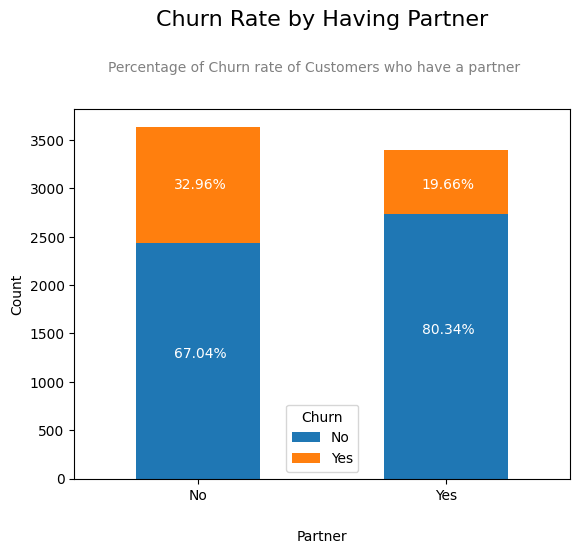

In [248]:
churn_partner.plot(kind='bar', stacked=True, rot=0)
plt.title('Churn Rate by Having Partner', loc='Center', pad=60, fontsize=16)
plt.suptitle('Percentage of Churn rate of Customers who have a partner', fontsize=10, color='0.5')
plt.text(x=-0.1, y=3000, s='32.96%', color='white')
plt.text(x=-0.1, y=1250, s='67.04%', color='white')
plt.text(x=0.9, y=1500, s='80.34%', color='white')
plt.text(x=0.9, y=3000, s='19.66%', color='white')
plt.xlabel("Partner", labelpad=20)
plt.ylabel("Count")
plt.show()

Kesimpulan:


1.   Customer yang memiliki Partner tingkat tidak Churn lebih tinggi (80.34%), daripada Customer yang tidak memiliki Partner (67.04%) 
2.   Customer yang memiliki Partner tingkat Churn lebih rendah (19.66%), daripada Customer yang tidak memiliki Partner (32.96%)



######Churn Rate by Having Dependents

In [249]:
print("Total of Customers Churn by Customers who have Dependents: ")
churn_dependents = df_filter.groupby('Dependents')['Churn'].value_counts().unstack()
churn_dependents

Total of Customers Churn by Customers who have Dependents: 


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [250]:
print("Total of Customers Churn by Customers who have Dependents (%): ")
churn_dependents_rate = round(df_filter.groupby('Dependents')['Churn'].value_counts(normalize=True)*100, 2).unstack()
churn_dependents_rate

Total of Customers Churn by Customers who have Dependents (%): 


Churn,No,Yes
Dependents,,
No,68.72,31.28
Yes,84.55,15.45


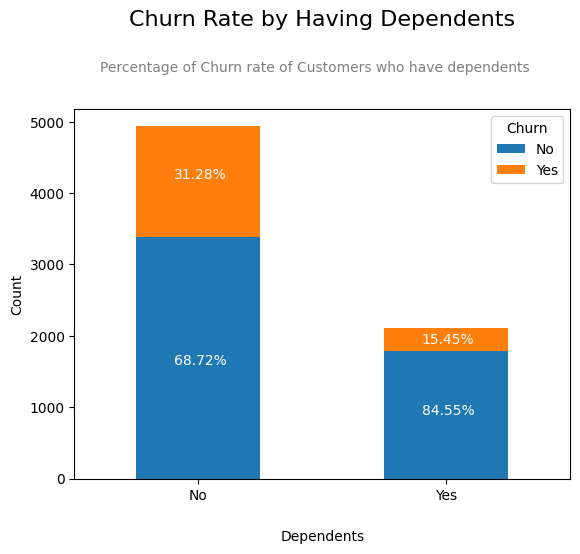

In [251]:
churn_dependents.plot(kind='bar', stacked=True, rot=0)
plt.title('Churn Rate by Having Dependents', loc='Center', pad=60, fontsize=16)
plt.suptitle('Percentage of Churn rate of Customers who have dependents', fontsize=10, color='0.5')
plt.text(x=-0.1, y=4200, s='31.28%', color='white')
plt.text(x=-0.1, y=1600, s='68.72%', color='white')
plt.text(x=0.9, y=900, s='84.55%', color='white')
plt.text(x=0.9, y=1890, s='15.45%', color='white')
plt.xlabel("Dependents", labelpad=20)
plt.ylabel("Count")
plt.show()

Kesimpulan: 


1.   Customer yang memiliki Dependents tingkat tidak Churn lebih tinggi (84.55%), daripada Customer yang tidak memiliki Dependents (68.72%)
2.   Customer yang memiliki Dependents tingkat Churn lebih rendah (15.45%), daripada Customer yang tidak memiliki Dependents (31.28%)



######Churn Rate by Having Partner and Dependents

In [252]:
print("Total of Customers Churn by Customers who have Partner and Dependents: ")
churn_partner_dependents = df_filter.groupby(['Partner_Dependents'])['Churn'].value_counts().unstack()
churn_partner_dependents

Total of Customers Churn by Customers who have Partner and Dependents: 


Churn,No,Yes
Partner_Dependents,,
No_No,2157,1123
No_Yes,284,77
Yes_No,1233,420
Yes_Yes,1500,249


In [253]:
print("Total of Customers Churn by Customers who have Partner and Dependents (%): ")
churn_partner_dependents_rate = round(df_filter.groupby(['Partner_Dependents'])['Churn'].value_counts(normalize=True)*100,2).unstack()
churn_partner_dependents_rate

Total of Customers Churn by Customers who have Partner and Dependents (%): 


Churn,No,Yes
Partner_Dependents,,
No_No,65.76,34.24
No_Yes,78.67,21.33
Yes_No,74.59,25.41
Yes_Yes,85.76,14.24


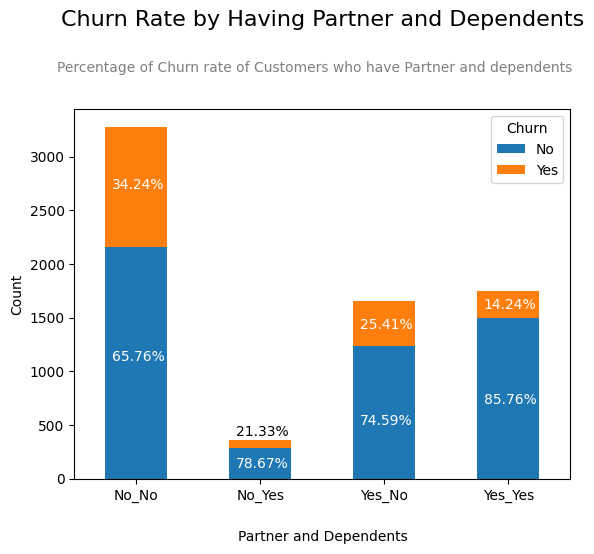

In [254]:
churn_partner_dependents.plot(kind='bar', stacked=True, rot=0)
plt.title('Churn Rate by Having Partner and Dependents', loc='Center', pad=60, fontsize=16)
plt.suptitle('Percentage of Churn rate of Customers who have Partner and dependents', fontsize=10, color='0.5')
plt.text(x=-0.2, y=2700, s='34.24%', color='white')
plt.text(x=-0.2, y=1100, s='65.76%', color='white')
plt.text(x=0.8, y=400, s='21.33%', color='black')
plt.text(x=0.8, y=100, s='78.67%', color='white')
plt.text(x=1.8, y=1400, s='25.41%', color='white')
plt.text(x=1.8, y=500, s='74.59%', color='white')
plt.text(x=2.8, y=1580, s='14.24%', color='white')
plt.text(x=2.8, y=700, s='85.76%', color='white')
plt.xlabel("Partner and Dependents", labelpad=20)
plt.ylabel("Count")
plt.show()

Kesimpulan:


1.   Customer yang memiliki Partner dan Dependents tingkat tidak Churn lebih tinggi (85.76%) dan tingkat Churn lebih rendah (14.24%) daripada Customer yang lain
2.   Customer yang tidak memiliki Partner dan Dependents tingkat Churn lebih tinggi (34.24%) daripada Customer yang lain 



##5. State 1 actionable insight from the data visualization

Berdasarkan 3 visualisasi data menggunakan diagram batang diatas, dapat disimpulkan sebagai berikut:
1. Customer yang tidak memiliki Partner merupakan Customer dengan tingkat Churn yang tertinggi (32.96%), namun apabila Customer memiliki Dependents tingkat Churn akan lebih rendah (21.33%)
2. Customer yang tidak memiliki Dependents merupakan Customer dengan tingkat Churn yang tertinggi (31.28%), namun apabila Customer memiliki Partner tingkat Churn akan lebih rendah (25.41%)
3. Customer yang tidak memiliki Partner dan Dependents merupakan Customer dengan tingkat Churn yang tertinggi (34.24%) 

Menurut saya Partner disini adalah pasangan (apakah mempunyai pasangan atau tidak), dan Dependents (tanggungan keluarga bisa anak atau pasangan apabila sudah menikah/tanggungan yang lain). Berdasarkan kesimpulan di atas, rata-rata Customer yang tidak memiliki Pasangan dan Tanggungan lebih memungkinkan untuk melakukan Churn (berhenti berlangganan). Oleh karena itu Customer tersebut harus diberikan perhatian lebih agar tetap stay dengan memberikan promo khusus dan meningkatkan pelayanan yang lebih baik dan menarik.